In [90]:
#PATH_data = f"../abyss_data/"
#Mount external drive: sudo mount -t drvfs D: /mnt/d
PATH_data = f"/mnt/d/abyss_data/"
PATH_GENO = f"{PATH_data}genotype"
PATH_SUMSTAT = f"{PATH_GENO}/sumstat/"
PATH_SUMSTAT_no_corr = f"{PATH_data}sumstat_no_corr"
PATH_GENO_segmented = f"{PATH_GENO}/segmented/"
PATH_GENO_mini_dim = f"{PATH_GENO}/mini_dim/"
PATH_GENO_maf = f"{PATH_GENO}/maf/"


PATH_PHENO = f"{PATH_data}phenotype/"
PATH_PHENO_ancestry = f"{PATH_PHENO}/ancestry/all.panel"
PATH_PLOTS = f"{PATH_data}plots/"
PATH_PARAMS = './hyper_params_to_test_AF.txt'
SEABORN_COLORS = [
    'black',
    'k',
    'dimgray',
    'dimgrey',
    'gray',
    'grey',
    'lightgray',
    'lightgrey',
    'darkgrey',
    'silver',
    'lightgray',
    'lightgrey',
    'gainsboro',
    'whitesmoke',
    'w',
    'white',
    'snow',
    'rosybrown',
    'lightcoral',
    'indianred',
    'brown',
    'firebrick',
    'maroon',
    'darkred',
    'r',
    'red',
    'mistyrose',
    'salmon',
    'tomato',
    'darksalmon',
    'coral',
    'orangered',
    'lightsalmon',
    'sienna',
    'seashell',
    'chocolate',
    'saddlebrown',
    'sandybrown',
    'peachpuff',
    'peru',
    'linen',
    'bisque',
    'darkorange',
    'burlywood',
    'antiquewhite',
    'tan',
    'navajowhite',
    'blanchedalmond',
    'papayawhip',
    'moccasin',
    'orange',
    'wheat',
    'oldlace',
    'floralwhite',
    'darkgoldenrod',
    'goldenrod',
    'cornsilk',
    'gold',
    'lemonchiffon',
    'khaki',
    'palegoldenrod',
    'darkkhaki',
    'ivory',
    'beige',
    'lightyellow',
    'lightgoldenrodyellow',
    'olive',
    'y',
    'yellow',
    'olivedrab',
    'yellowgreen',
    'darkolivegreen',
    'greenyellow',
    'chartreuse',
    'lawngreen',
    'honeydew',
    'darkseagreen',
    'palegreen',
    'lightgreen',
    'forestgreen',
    'limegreen',
    'darkgreen',
    'g',
    'green',
    'lime',
    'seagreen',
    'mediumseagreen',
    'springgreen',
    'mintcream',
    'mediumspringgreen',
    'mediumaquamarine',
    'aquamarine',
    'turquoise',
    'lightseagreen',
    'mediumturquoise',
    'azure',
    'lightcyan',
    'paleturquoise',
    'darkslategray',
    'darkslategrey',
    'teal',
    'darkcyan',
    'c',
    'aqua',
    'cyan',
    'darkturquoise',
    'cadetblue',
    'powderblue',
    'lightblue',
    'deepskyblue',
    'skyblue',
    'lightskyblue',
    'steelblue',
    'aliceblue',
    'dodgerblue',
    'lightslategray',
    'lightslategrey',
    'slategrey',
    'slategray',
    'lightsteelblue',
    'cornflowerblue',
    'royalblue',
    'ghostwhite',
    'lavender',
    'midnightblue',
    'navy',
    'darkblue',
    'mediumblue',
    'b',
    'blue',
    'slateblue',
    'darkslateblue',
    'mediumslateblue',
    'mediumpurple',
    'rebeccapurple',
    'blueviolet',
    'indigo',
    'darkorchid',
    'darkviolet',
    'mediumorchid',
    'thistle',
    'plum',
    'violet',
    'purple',
    'darkmagenta',
    'm',
    'fuchsia',
    'magenta',
    'orchid',
    'mediumvioletred',
    'deeppink',
    'hotpink',
    'lavenderblush',
    'palevioletred',
    'crimson',
    'pink',
    'lightpink'
]

In [91]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import pandas as pd  # Import Pandas and Numpy to create databases
from collections import Counter
import os
from os import listdir
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '4'

In [92]:
effect = 5
chrom = 21
sigmap = 5
sit = 'no_strat_causal'
# Fetch the lower dimensionality representation of the samples

path_dims = PATH_GENO_mini_dim + "reduction_of_shuffled_unshuffled.pkl"
dims = pd.read_pickle(path_dims)

# If you happen to have labelled population data, we can create a synthetic phenotype containing population stratification

path_humans = PATH_PHENO_ancestry
humans = pd.read_csv(path_humans, sep="\t")
humans = humans.drop(columns=['Unnamed: 5', 'Unnamed: 6'])
humans = humans.rename({'sample': 'FID', 'sample.1': 'IID'}, axis=1)
humans['ancestry'] = humans['super_pop']
humans['ancestry'].mask(humans['super_pop'] == 'AFR', 0, inplace=True)
humans['ancestry'].mask(humans['super_pop'] == 'AMR', 1, inplace=True)
humans['ancestry'].mask(humans['super_pop'] == 'EAS', 2, inplace=True)
humans['ancestry'].mask(humans['super_pop'] == 'EUR', 3, inplace=True)
humans['ancestry'].mask(humans['super_pop'] == 'SAS', 4, inplace=True)


In [93]:
humans

,FID,IID,pop,super_pop,gender,ancestry
0,HG00096,HG00096,GBR,EUR,male,3
1,HG00097,HG00097,GBR,EUR,female,3
2,HG00099,HG00099,GBR,EUR,female,3
3,HG00100,HG00100,GBR,EUR,female,3
4,HG00101,HG00101,GBR,EUR,male,3
...,...,...,...,...,...,...
2499,NA21137,NA21137,GIH,SAS,female,4
2500,NA21141,NA21141,GIH,SAS,female,4
2501,NA21142,NA21142,GIH,SAS,female,4
2502,NA21143,NA21143,GIH,SAS,female,4


In [94]:
# Make synthetic phenotype with no population stratification and no causal effect

afr = humans.loc[humans['ancestry'] == 0]
amr = humans.loc[humans['ancestry'] == 1]
eas = humans.loc[humans['ancestry'] == 2]
eur = humans.loc[humans['ancestry'] == 3]
sas = humans.loc[humans['ancestry'] == 4]

mu, sigma = 150, sigmap  # mean and standard deviation for africans
afr["no_strat_no_causal"] = np.random.normal(mu, sigma, len(afr))
afr["bias_no_strat"] = 150
mu, sigma = 150, sigmap  # mean and standard deviation for americans
amr["no_strat_no_causal"] = np.random.normal(mu, sigma, len(amr))
amr["bias_no_strat"] = 150
mu, sigma = 150, sigmap  # mean and standard deviation for east asians
eas["no_strat_no_causal"] = np.random.normal(mu, sigma, len(eas))
eas["bias_no_strat"] = 150
mu, sigma = 150, sigmap  # mean and standard deviation for europeans
eur["no_strat_no_causal"] = np.random.normal(mu, sigma, len(eur))  # 4
eur["bias_no_strat"] = 150
mu, sigma = 150, sigmap  # mean and standard deviation for south east asians
sas["no_strat_no_causal"] = np.random.normal(mu, sigma, len(sas))  # 5
sas["bias_no_strat"] = 150

# Make synthetic phenotype with population stratification and no causal effect

mu, sigma = 190, sigmap  # mean and standard deviation for africans
afr["strat_no_causal"] = np.random.normal(mu, sigma, len(afr))
afr["bias_strat"] = 180
mu, sigma = 170, sigmap  # mean and standard deviation for americans
amr["strat_no_causal"] = np.random.normal(mu, sigma, len(amr))
amr["bias_strat"] = 170
mu, sigma = 150, sigmap  # mean and standard deviation for east asians
eas["strat_no_causal"] = np.random.normal(mu, sigma, len(eas))
eas["bias_strat"] = 150
mu, sigma = 180, sigmap  # mean and standard deviation for europeans
eur["strat_no_causal"] = np.random.normal(mu, sigma, len(eur))  # 4
eur["bias_strat"] = 175
mu, sigma = 160, sigmap  # mean and standard deviation for south east asians
sas["strat_no_causal"] = np.random.normal(mu, sigma, len(sas))  # 5
sas["bias_strat"] = 160
humans = pd.concat([afr, amr, eas, eur, sas]).sort_index()


/tmp/ipykernel_2166/241549742.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afr["no_strat_no_causal"] = np.random.normal(mu, sigma, len(afr))
/tmp/ipykernel_2166/241549742.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afr["bias_no_strat"] = 150
/tmp/ipykernel_2166/241549742.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

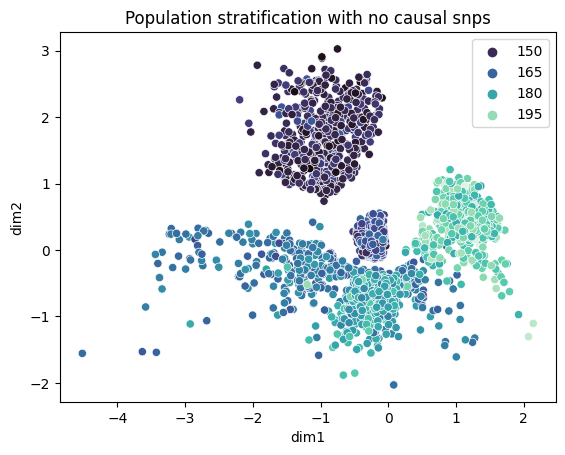

In [95]:
sns.scatterplot(
    data=dims,
    x="dim1",
    y="dim2",
    hue=list(humans['strat_no_causal']),
    palette="mako",
    legend='brief'
).set(title=f"Population stratification with no causal snps")
plt.savefig(f"./y_pred_strat_no_causal_landscape_original.png")


In [96]:
# Add causal snps

In [97]:
folder = 'unshuffled'

In [98]:
humans['no_strat_causal'] = humans['no_strat_no_causal']
humans['strat_causal'] = humans['strat_no_causal']


path_genos = PATH_GENO_segmented + f"chrom_{chrom}/unshuffled/"
onlyfiles_input = [f for f in listdir(path_genos)]

In [99]:
nums = [f.split('_')[0] for f in onlyfiles_input]
uniq = list(Counter(nums).keys())
snps_popped = []
mafs = []
causal_effects = []
for num in uniq[0:1]:
    segment = [f for f in onlyfiles_input if f.split('_')[0] == num]
    popped = segment.pop()
    maf = popped.split("maf_")[1].split('.pkl')[0]
    mafs.append(maf)
    snps = pd.read_pickle(path_genos+popped)
    snp_nr = 1
    snp = snps.iloc[:, snp_nr]
    snps_popped.append(snp)
    name = snps.columns[snp_nr]
    afs = popped.split('maf_')[1].split('.pkl')[0]
    causal_effects.append(effect)
    snp_effect = snps.iloc[:, snp_nr] * effect
    #snp_effect = snps.iloc[:, snp_nr] * (effect/float(maf.split('_')[0]))

    humans['no_strat_causal'] = humans['no_strat_causal'] + snp_effect
    humans['strat_causal'] = humans['strat_causal'] + snp_effect

In [100]:
causal_snps = pd.DataFrame(data=snps_popped).T
mafs = pd.DataFrame(data=mafs)
c_effects = pd.DataFrame(data=causal_effects)


In [101]:
Cs = list(causal_snps.columns)
Cs = pd.DataFrame(data=Cs, columns=['snp'])
Cs['effects'] = list(c_effects[0])
Cs['mafs'] = list(mafs[0])

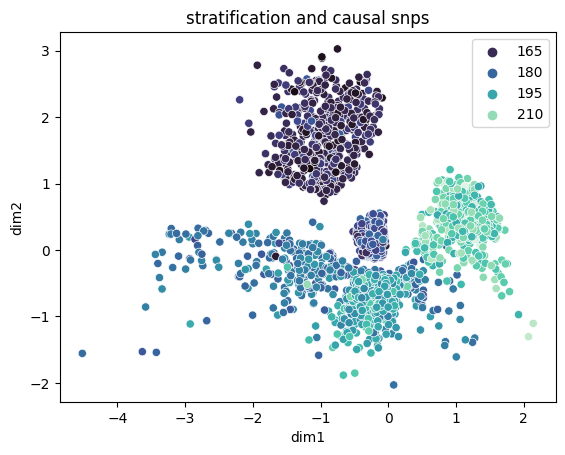

In [102]:
sns.scatterplot(
    data=dims,
    x="dim1",
    y="dim2",
    hue=list(humans['strat_causal']),
    palette="mako",
    legend='brief'
).set(title=f"stratification and causal snps")
plt.savefig(f"./y_pred_strat_no_causal_landscape_original.png")

In [103]:
folder = 'unshuffled'


os.system(f"mkdir {PATH_GENO}/sumstat/")
os.system(f"mkdir {PATH_GENO}/sumstat/chrom_{chrom}/")


mkdir: cannot create directory ‘/mnt/d/abyss_data/genotype/sumstat/’: File exists
mkdir: cannot create directory ‘/mnt/d/abyss_data/genotype/sumstat/chrom_21/’: File exists


256

In [104]:
path_output = PATH_GENO + "/sumstat/"
path_humans = PATH_PHENO
humans = pd.read_pickle(f"{path_humans}synthetic/synthetic_pheno.pkl")

path_dims = PATH_GENO_mini_dim + "reduction_of_shuffled_unshuffled.pkl"
dims = pd.read_pickle(path_dims)


In [105]:
dims

,dim1,dim2
0,0.013587,-0.918103
1,-0.288266,-1.111984
2,-0.228004,-0.746098
3,-0.252506,-0.953229
4,-0.819696,-1.467735
...,...,...
2499,-0.280842,0.237587
2500,-0.248008,0.131941
2501,-0.262115,0.067555
2502,-0.078434,0.155968


In [106]:
path_genos = PATH_GENO_segmented + f"chrom_{chrom}/"
path_mafs = PATH_GENO_maf + f"chrom_{chrom}/{folder}/"
onlyfiles_input = [f for f in listdir(path_genos + folder)]


In [107]:
onlyfiles_input

['3_0_1198_3_maf_0.0006_0.001.pkl',
 '3_1_889_3_maf_0.0006_0.001.pkl',
 '3_2_1039_3_maf_0.0006_0.001.pkl',
 '3_3_1039_3_maf_0.0006_0.001.pkl',
 '3_4_1071_3_maf_0.0006_0.001.pkl',
 '3_5_800_3_maf_0.0006_0.001.pkl',
 '3_6_800_3_maf_0.0006_0.001.pkl',
 '3_7_1139_3_maf_0.0006_0.001.pkl',
 '3_8_931_3_maf_0.0006_0.001.pkl',
 '3_9_1094_3_maf_0.0006_0.001.pkl',
 '17_0_1200_17_maf_0.12_0.16.pkl',
 '17_1_1200_17_maf_0.12_0.16.pkl',
 '17_2_1147_17_maf_0.12_0.16.pkl',
 '17_3_800_17_maf_0.12_0.16.pkl',
 '17_4_1174_17_maf_0.12_0.16.pkl',
 '17_5_879_17_maf_0.12_0.16.pkl',
 '17_6_800_17_maf_0.12_0.16.pkl',
 '17_7_1200_17_maf_0.12_0.16.pkl',
 '17_8_800_17_maf_0.12_0.16.pkl',
 '17_9_800_17_maf_0.12_0.16.pkl',
 '15_0_1138_15_maf_0.067_0.093.pkl',
 '15_1_1177_15_maf_0.067_0.093.pkl',
 '15_2_800_15_maf_0.067_0.093.pkl',
 '15_3_1016_15_maf_0.067_0.093.pkl',
 '15_4_1069_15_maf_0.067_0.093.pkl',
 '15_5_1200_15_maf_0.067_0.093.pkl',
 '15_6_800_15_maf_0.067_0.093.pkl',
 '15_7_800_15_maf_0.067_0.093.pkl',
 '15_8

In [108]:
sit

'no_strat_causal'

In [109]:
bias = np.array(humans[sit])

In [110]:
bias

array([286.17922006, 284.81916303, 287.6682017 , ..., 284.75124794,
       286.87784811, 282.17980577])

In [111]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [112]:
for file in onlyfiles_input:
    path_file = path_genos + folder + '/' + file
    genos = pd.read_pickle(path_file)
    #AF = pd.read_pickle(path_mafs + file)
    #effect_matrix = genos - AF
    effect_matrix = genos
    X = effect_matrix
    y = bias
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    sumstat = pd.DataFrame(data={
        'snp': list(est2.pvalues.index)[1:],
        'coef': list(est2.params)[1:],
        'std_err': list(est2.bse)[1:],
        't': list(est2.tvalues)[1:],
        'P': list(est2.pvalues[1:]),
        '0.025': list(est2.conf_int()[0])[1:],
        '0.975': list(est2.conf_int()[1])[1:]
    })
    sumstat['#CHROM'] = sumstat['snp'].str[:2].astype(int)
    sumstat['POS'] = [i.split(':', 1)[0]
                      for i in list(sumstat['snp'].str[3:-5])]
    sumstat['POS'] = sumstat['POS'].astype(int)
    sumstat['-logp'] = - np.log(sumstat['P'])
    print(sumstat)
    sumstat.to_pickle(f"{path_output}chrom_{chrom}/{file}")


                    snp       coef    std_err         t         P      0.025  \
0     21:10892322:A:G_A   1.463597   5.509010  0.265673  0.790529  -9.342966   
1     21:47368531:A:G_G   1.739826   4.210340  0.413227  0.679502  -6.519246   
2     21:32892189:A:G_G   5.184365   4.499121  1.152306  0.249387  -3.641183   
3     21:15792338:A:C_C   0.532963   0.801078  0.665306  0.505961  -1.038446   
4     21:25645657:G:T_T  23.141041  14.938831  1.549053  0.121589  -6.163212   
...                 ...        ...        ...       ...       ...        ...   
1193  21:33188688:C:G_G  -7.186426  11.925554 -0.602607  0.546865 -30.579786   
1194  21:27248687:A:G_G   5.413571   5.255224  1.030131  0.303122  -4.895161   
1195  21:21654472:A:G_G   2.516373   4.767492  0.527819  0.597706  -6.835617   
1196  21:18913007:A:G_G  -0.339382   1.099959 -0.308541  0.757716  -2.497080   
1197  21:22187567:G:T_T  -2.188314   4.177886 -0.523785  0.600509 -10.383723   

          0.975  #CHROM       POS     -

In [113]:
path_sumstat = PATH_SUMSTAT

chrom_files = [f for f in listdir(path_sumstat) if f != 'total_sumstat.pkl']
chrom_files = [f for f in chrom_files if f == f"chrom_{chrom}"]
sumstat_array = []
for chrom_file in chrom_files:
    sumstat_files = [f for f in listdir(path_sumstat + chrom_file + '/')]
    # first do it with the first one
    path_file = path_sumstat + chrom_file + '/' + sumstat_files[0]
    sumstats = pd.read_pickle(path_file)
    for sumstat_file in sumstat_files[1:]:
        path_file = path_sumstat + chrom_file + '/' + sumstat_file
        temp = pd.read_pickle(path_file)
        sumstats = pd.concat([sumstats,temp])
    sumstat_array.append(sumstats)

sumstats = sumstat_array[0]
for sumstat in sumstat_array[1:]:
    sumstats = pd.concat([sumstats,sumstat]) 

In [114]:
sumstats = sumstats.reset_index(drop=True)

In [115]:
running_pos = 0
cumulative_pos = []
for chrom, group_df in sumstats.groupby('#CHROM'):
    cumulative_pos.append(group_df['POS'] + running_pos)
    running_pos += group_df['POS'].max()

sumstats['cumulative_pos'] = pd.concat(cumulative_pos)
sumstats['SNP number'] = sumstats.index

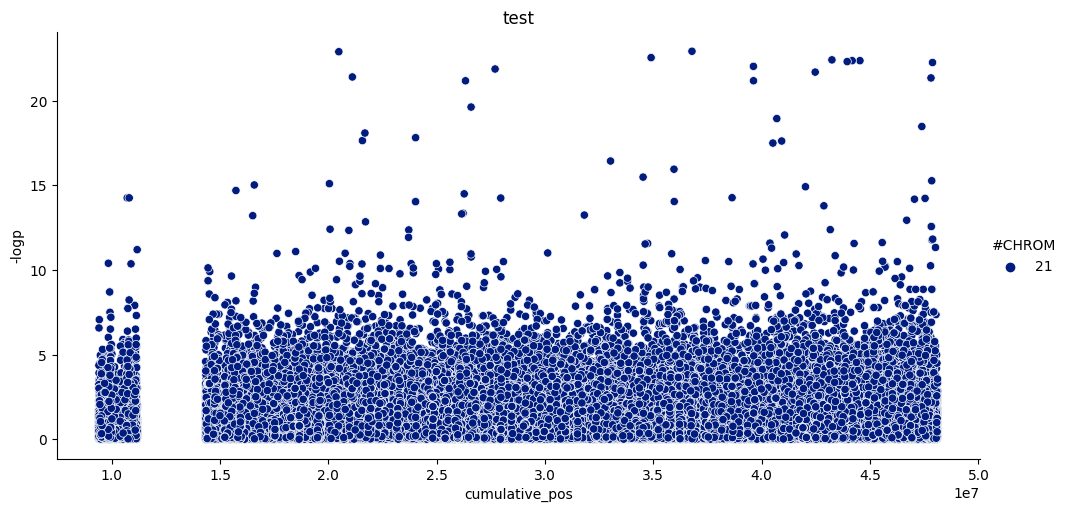

In [116]:
sns.relplot(
    data=sumstats,
    x='cumulative_pos',
    y='-logp',
    aspect=2,
    hue='#CHROM',
    palette='dark'
).set(title=f"test")
plt.savefig(f"./y_pred_strat_no_causal_landscape_original.png")

In [117]:
for file in onlyfiles_input:
    path_file = path_genos + folder + '/' + file
    genos = pd.read_pickle(path_file)
    #AF = pd.read_pickle(path_mafs + file)
    #effect_matrix = genos - AF
    effect_matrix = genos
    print(list(genos.head(1))[0])


21:10892322:A:G_A
21:45272024:A:G_G
21:46809494:A:G_A
21:29868522:G:T_T
21:35600660:C:T_C
21:16928699:A:G_G
21:37466946:A:G_G
21:31228342:A:G_G
21:37858222:A:G_A
21:43757236:C:T_T
21:16998015:A:G_G
21:43940047:G:T_T
21:16688499:C:T_C
21:40163983:C:T_T
21:33915471:A:G_G
21:30188968:C:T_C
21:33211246:A:G_A
21:19559058:A:G_A
21:19324970:C:T_C
21:37639865:C:G_C
21:16846291:C:T_T
21:27774963:G:T_T
21:44350854:C:T_C
21:24386539:A:G_G
21:22044897:A:G_A
21:20438012:A:C_C
21:25105989:C:G_C
21:22775247:A:G_A
21:30951738:C:T_T
21:23035765:A:T_T
21:41460607:A:C_A
21:22225004:A:G_G
21:31350939:A:G_G
21:30995225:A:G_G
21:18799510:A:G_G
21:41743309:A:G_A
21:31238822:C:T_C
21:46001361:A:G_G
21:44401810:C:T_C
21:47626104:A:G_G
21:27088153:A:C_A
21:31105150:A:C_A
21:41062745:A:G_G
21:37153677:C:G_G
21:38507476:C:G_C
21:38293901:C:G_G
21:37957219:A:G_G
21:29189516:C:G_G
21:39912604:A:G_G
21:27802163:C:T_T
21:19788178:C:T_C
21:20271175:A:T_T
21:20177147:C:T_C
21:14361960:A:G_G
21:19243803:A:G_A
21:1018195